In [6]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [7]:
FILE_PATH = "C:/Users/Niharika/Documents/caseStudy/"

df_case = pd.read_csv(FILE_PATH+"casestudy.csv",index_col="Unnamed: 0")
df_case.head(5)

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


In [8]:
#Total revenue for current year
total_revenue = df_case["net_revenue"].sum()
tot_revenue_year = df_case.groupby("year").sum()
tot_revenue_year

,net_revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


In [9]:
cust = df_case[["customer_email","year"]]
cust_1 = df_case.loc[df_case["year"]==2015]
cust_2 = df_case.loc[df_case["year"]==2016]
cust_3 = df_case.loc[df_case["year"]==2017]

#New Customer Revenue - 2017
cust_new = cust_3.customer_email.isin(cust_2.customer_email) | cust_3.customer_email.isin(cust_1.customer_email)
new_cust = cust_3[~cust_new]
cust_rev1 = new_cust["net_revenue"].sum()

#New Customer Revenue - 2016
cust_new = cust_2.customer_email.isin(cust_1.customer_email)
new_cust = cust_2[~cust_new]
cust_rev2 = new_cust["net_revenue"].sum()

#New Customer Revenue - 2015
cust_rev3 = cust_1["net_revenue"].sum()

print("Revenue for new customers in 2017: "+str(cust_rev1)+"\nRevenue for new customers in 2016: "+str(cust_rev2)+"\nRevenue for new customers in 2015: "+str(cust_rev3))

Revenue for new customers in 2017: 28676607.64
Revenue for new customers in 2016: 18245491.01
Revenue for new customers in 2015: 29036749.189999994


In [10]:
#Existing Customer Growth - 2017
cust_exist_current = cust_3.customer_email.isin(cust_2.customer_email) | cust_3.customer_email.isin(cust_1.customer_email)
cust_exist_previous = cust_2.customer_email.isin(cust_1.customer_email)
new_cust_current = cust_3[cust_exist_current]
new_cust_prev = cust_2[cust_exist_previous]
exist_cust_growth_2017 = new_cust_current["net_revenue"].sum() - new_cust_prev["net_revenue"].sum()
exist_cust_growth_2016 = new_cust_prev["net_revenue"].sum() - cust_1["net_revenue"].sum()
exist_cust_growth_2015 = cust_1["net_revenue"].sum()

print("Existing Customer Growth - 2017: "+str(exist_cust_growth_2017)+"\nExisting Customer Growth - 2016: "+str(exist_cust_growth_2016)+"\nExisting Customer Growth - 2015: "+str(exist_cust_growth_2015))

Existing Customer Growth - 2017: -4744565.19
Existing Customer Growth - 2016: -21551296.609999992
Existing Customer Growth - 2015: 29036749.189999994


In [11]:
#Revenue lost from attrition - 2017
#exist - new /total 
print("Revenue lost from attrition 2015: " + str((exist_cust_growth_2015 - cust_rev3)/total_revenue))
print("Revenue lost from attrition 2016: " + str((exist_cust_growth_2016 - cust_rev2)/total_revenue))
print("Revenue lost from attrition 2017: " + str((exist_cust_growth_2017 - cust_rev1)/total_revenue))

Revenue lost from attrition 2015: 0.0
Revenue lost from attrition 2016: -0.4617590171960199
Revenue lost from attrition 2017: -0.3877832569522135


In [12]:
#Existing customer revenue current year
cust_exist_current = cust_3.customer_email.isin(cust_2.customer_email) | cust_3.customer_email.isin(cust_1.customer_email)
new_cust_current = cust_3[cust_exist_current]
print("Existing Customer Revenue Current Year: " + str(new_cust_current["net_revenue"].sum()))

Existing Customer Revenue Current Year: 2740887.3899999997


In [13]:
#Existing Customer Revenue Prior Year
cust_exist_prior = cust_2.customer_email.isin(cust_1.customer_email)
new_cust_prior = cust_2[cust_exist_prior]
print("Existing Customer Revenue Prior Year: " + str(new_cust_prior["net_revenue"].sum()))

cust_exist_prior = new_cust_prior["customer_email"].unique()
cust_exist_current = new_cust_current["customer_email"].unique()
cust_exist = len(cust_exist_current)+len(cust_exist_prior)

Existing Customer Revenue Prior Year: 7485452.58


In [14]:
#Total Customers Current Year
customers_current = cust_3["customer_email"].unique()
print("Total customers current year: " + str(len(customers_current)))

Total customers current year: 249987


In [15]:
#Total Customers Previous Year
customers_previous = cust_2["customer_email"].unique()
print("Total customers current year: " + str(len(customers_previous)))

Total customers current year: 204646


In [16]:
#New Customers
cust_exist_current = cust_3.customer_email.isin(cust_2.customer_email) | cust_3.customer_email.isin(cust_1.customer_email)
new_cust_current1 = cust_3[~cust_exist_current]
cust_exist_current = cust_2.customer_email.isin(cust_2.customer_email) 
new_cust_current2 = cust_2[~cust_exist_current]
customers_new_1 = new_cust_current1["customer_email"].unique()
customers_new_2 = new_cust_current2["customer_email"].unique()
cust_new = len(customers_new_1)+len(customers_new_2)
print("New Customers: " + str(cust_new))

New Customers: 228262


In [17]:
#Lost Customers
cust_exist_current = cust_2.customer_email.isin(cust_3.customer_email)
lost_cust_current1 = cust_2[~cust_exist_current]
cust_exist_current = cust_1.customer_email.isin(cust_2.customer_email) 
lost_cust_current2 = cust_1[~cust_exist_current]
customers_lost = np.concatenate((lost_cust_current1,lost_cust_current2))
customers_1 = [customer[0] for customer in customers_lost]
cust_lost = len(set(customers_1))
print("Lost Customers: " + str(cust_lost))

Lost Customers: 355397


([<matplotlib.patches.Wedge at 0x2042b9f3040>,
 [Text(0.5672791363755616, 1.0574471057376804, 'new'),
  Text(-0.9899688967335508, 0.678204676701773, 'returning'),
  Text(-0.12964728138750958, -1.1929759353938487, 'lost')])

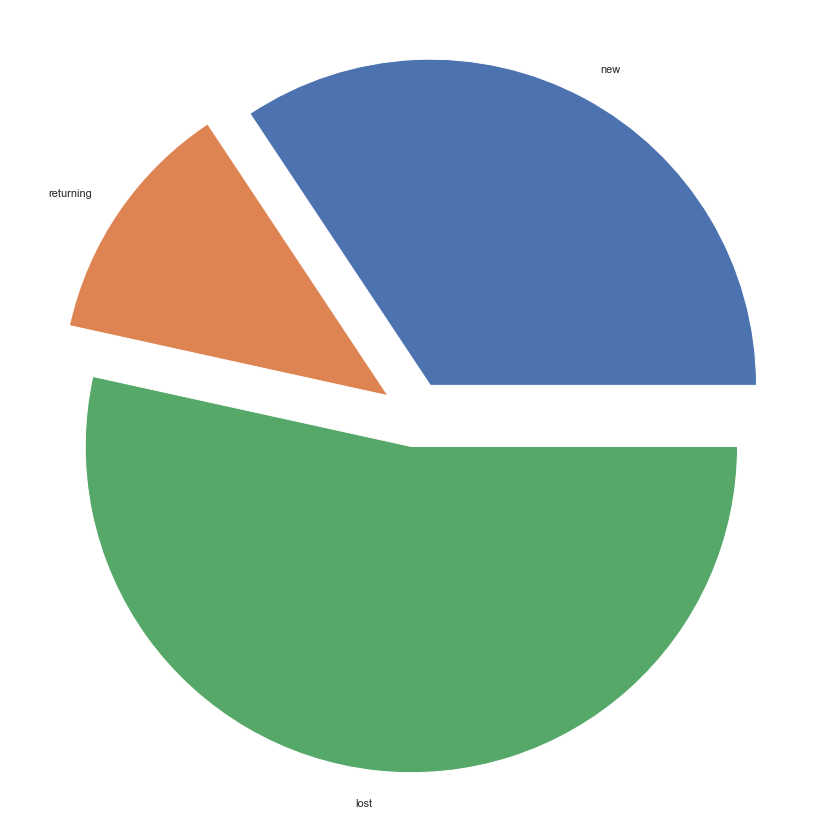

In [22]:
customers_labels = ["new","returning","lost"]
customers = [cust_new,cust_exist,cust_lost]
plt.pie(customers,labels = customers_labels, explode = [0.1,0.1,0.1])
#From the below plot we can see that the company lost old customers in higher percentage. 

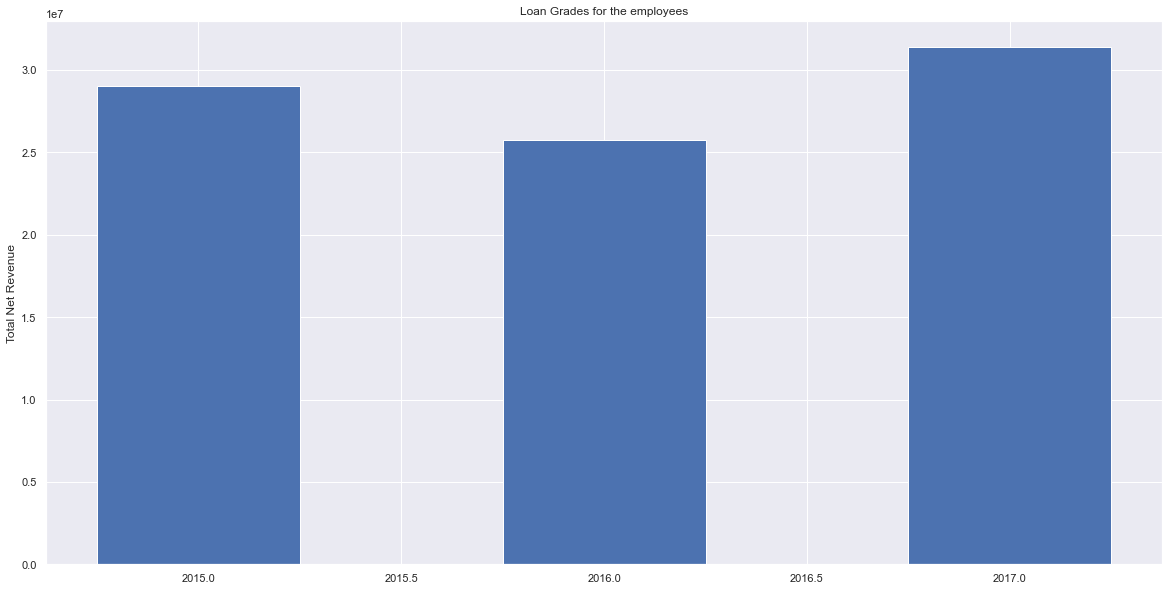

In [21]:
fig, ax = plt.subplots()
ax.bar(tot_revenue_year.index, tot_revenue_year["net_revenue"], 0.5)
sb.set(rc = {'figure.figsize':(25,15)})
ax.set_ylabel('Total Net Revenue')
ax.set_title('Loan Grades for the employees')

plt.show()
#From the below plot, we can say that year 2017 made more net_revenue than other years
#We also noticed that 2016 year generated relatively less net revenue